In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [ ]:
# Datasets Files

# /content/drive/MyDrive/my_intellipaat_project/Netflix Data/Copy of combined_data_1.txt.zip

# /content/drive/MyDrive/my_intellipaat_project/Netflix Data/Copy of movie_titles.csv

In [ ]:
# for connecting google drive with google colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Reading dataset file having 2 crore 40 lakh 58 thousand records

netflix_dataset = pd.read_csv('/content/drive/MyDrive/my_intellipaat_project/Netflix Data/Copy of combined_data_1.txt.zip',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
netflix_dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [ ]:
netflix_dataset.isnull().sum()

,0
Cust_Id,0
Rating,4499


In [ ]:
netflix_dataset.isnull().sum()


,0
Cust_Id,0
Rating,4499


In [ ]:
#get the movie count ( as the NaN values in Rating column will show how many movie are there )
movie_count=netflix_dataset.isnull().sum()
movie_count=movie_count["Rating"]
movie_count

4499

In [ ]:
#to claculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()
customer_count

475257

In [ ]:
customer_count - movie_count  # Total number of customers that we have after removing movie id from the column

470758

In [ ]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count  # In Customer id column we will remove movie id to get how many total rating are there
rating_count 

24053764

In [ ]:
#To find out how many people have rated the movies as 1,2,3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


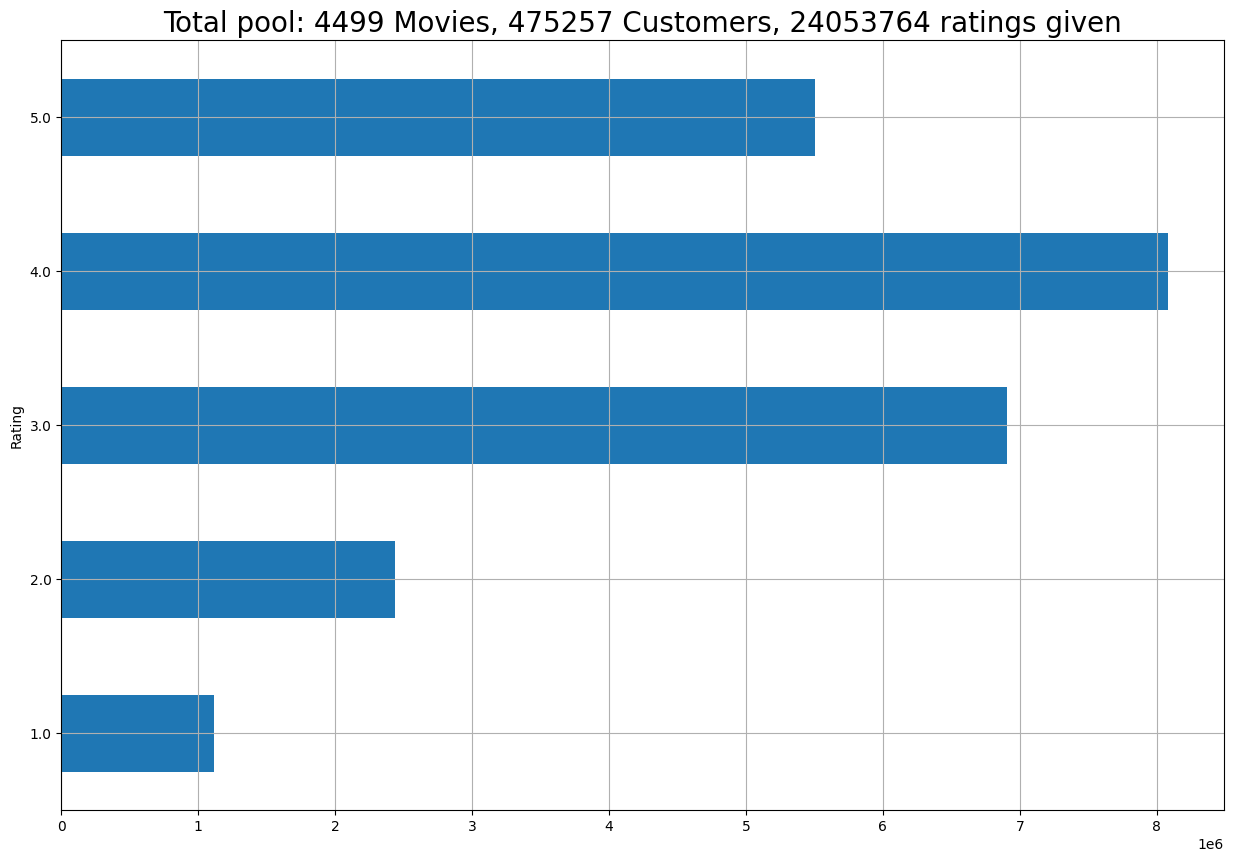

In [ ]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [ ]:
# Lets just make a clear dataframe to find how many MovieId are there
movie_id=None 
movie_np =[]
# Iterate over the DataFrame rows
for cust_id in netflix_dataset['Cust_Id']:
    if ':' in cust_id:
      # Update the current movie ID
      movie_id = int(cust_id.replace(':', ''))
    movie_np.append(movie_id)

In [ ]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
# Add the new column to the DataFrame
netflix_dataset['Movie_Id'] = movie_np

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 550.7+ MB


In [ ]:
netflix_dataset = netflix_dataset[netflix_dataset['Rating'].notna()]
# to excludes rows where the 'Rating' is NaN)to keep only the rows where the 'Rating' column is not null (i.e., i


In [ ]:
netflix_dataset["Cust_Id"]=netflix_dataset["Cust_Id"].astype(int)


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
#pre-filtering
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers

In [ ]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])
dataset_movie_summary


,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.6),0)
movie_benchmark

908.0

In [ ]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [ ]:
len(drop_movie_list)


2699

In [ ]:
4499-2699  #movies left

1800

In [ ]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

36.0

In [ ]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

In [ ]:
len(drop_cust_list)

282042

In [ ]:
# ~ means considering everything excluding this (drop_movie_list) (drop_cust_list)
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (19695836, 3)


In [ ]:
netflix_dataset


,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


# **Model Bulding**

In [ ]:
# loading secound dataset of movies title
df_title = pd.read_csv("/content/drive/MyDrive/my_intellipaat_project/Netflix Data/Copy of movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])


In [ ]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


! pip install scikit-surprise

'''
The surprise library in Python is used for building and analyzing recommender systems. It provides tools to work with collaborative
 filtering algorithms,
which are commonly used to recommend items (such as movies, books, or products) to users based on their past interactions or preferences.
'''

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357264 sha256=81e1d866cb5aaa807012286114252bcc5ebc65e550d45d4d3bee4329b76e8875
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader()

In [ ]:
# buliding model for first 100k records for quick runtime
data = Dataset.load_from_df(netflix_dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)


In [ ]:
data

In [ ]:
# creating a SVD model
model = SVD()

In [ ]:
cross_validate(model, data, measures=['RMSE'], cv=3)   # training SVD model

{'test_rmse': array([1.01942245, 1.0200912 , 1.01722918]),
 'fit_time': (1.497938871383667, 2.4558284282684326, 1.822688341140747),
 'test_time': (0.47075319290161133, 0.6013808250427246, 0.17768478393554688)}

# **Recomadations**

In [ ]:
# filtering the data for a specific user to whom we are going to suggest the movies
user_1331154=netflix_dataset[netflix_dataset['Cust_Id']==1331154]
user_1331154

,Cust_Id,Rating,Movie_Id
697,1331154,4.0,3
5178,1331154,4.0,8
31460,1331154,3.0,18
92840,1331154,4.0,30
224761,1331154,3.0,44
...,...,...,...
23439584,1331154,4.0,4389
23546489,1331154,2.0,4402
23649431,1331154,4.0,4432
23844441,1331154,3.0,4472


In [ ]:
# Remove less rated movies from new dataset also

user_1331154=user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

,Cust_Id,Rating,Movie_Id
697,1331154,4.0,3
5178,1331154,4.0,8
31460,1331154,3.0,18
92840,1331154,4.0,30
224761,1331154,3.0,44
...,...,...,...
23439584,1331154,4.0,4389
23546489,1331154,2.0,4402
23649431,1331154,4.0,4432
23844441,1331154,3.0,4472


In [ ]:
# prediction part
user_1331154["Estimated_Score"] = user_1331154["Movie_Id"].apply(lambda x: model.predict(1331154, x).est)

In [ ]:
user_1331154

,Cust_Id,Rating,Movie_Id,Estimated_Score
697,1331154,4.0,3,3.907882
5178,1331154,4.0,8,2.457575
31460,1331154,3.0,18,3.436997
92840,1331154,4.0,30,3.556394
224761,1331154,3.0,44,3.564660
...,...,...,...,...
23439584,1331154,4.0,4389,3.564660
23546489,1331154,2.0,4402,3.564660
23649431,1331154,4.0,4432,3.564660
23844441,1331154,3.0,4472,3.564660


In [ ]:
# Display top 5 movies with highest estimated score that user 1331154 may like
user_1331154.sort_values('Estimated_Score', ascending=False)

,Cust_Id,Rating,Movie_Id,Estimated_Score
697,1331154,4.0,3,3.907882
15499121,1331154,3.0,2992,3.564660
14167769,1331154,5.0,2743,3.564660
14343450,1331154,2.0,2780,3.564660
14363169,1331154,4.0,2782,3.564660
...,...,...,...,...
7894470,1331154,3.0,1585,3.564660
7919860,1331154,4.0,1590,3.564660
92840,1331154,4.0,30,3.556394
31460,1331154,3.0,18,3.436997


In [ ]:
user_1331154.sort_values('Estimated_Score', ascending=False).head(5)

,Cust_Id,Rating,Movie_Id,Estimated_Score
697,1331154,4.0,3,3.907882
15499121,1331154,3.0,2992,3.564660
14167769,1331154,5.0,2743,3.564660
14343450,1331154,2.0,2780,3.564660
14363169,1331154,4.0,2782,3.564660
